# **ANALISA SENTIMEN MENGGUNAKAN ALGORITMA LOGISTIC REGRESSION** 

In [1]:
#Melakukan Impor Library

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Mengimport Dataset

data = pd.read_csv("https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv")

del data['Id']
data.head()

,Sentiment,Text Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [ ]:
#Cek Kolom
display(data.columns)



Index(['Sentiment', 'Text Tweet'], dtype='object')

In [ ]:
#Cek Jumlah baris dan Kolom 
display(data.shape)

(300, 2)

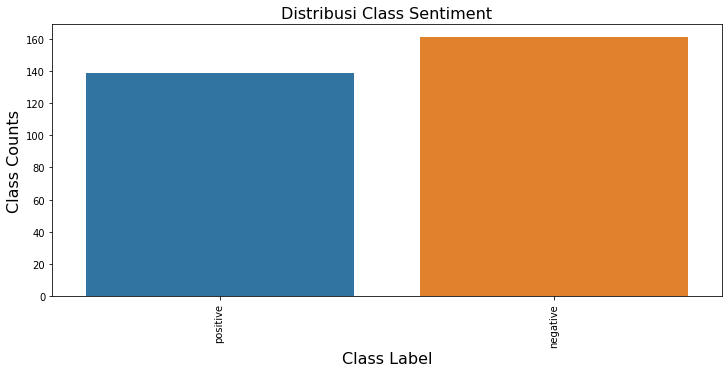

In [ ]:
#Cek Jumlah Review Positive dan Negative
plt.figure(figsize=(12,5))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribusi Class Sentiment', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

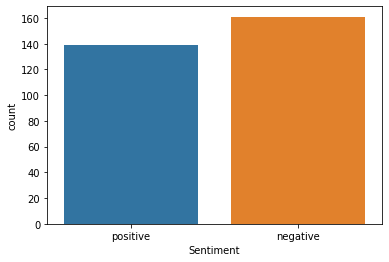

In [ ]:
#Cek Sentiment yang mendapat Review Paling Tinggi 
sns.countplot(x='Sentiment', data=data);

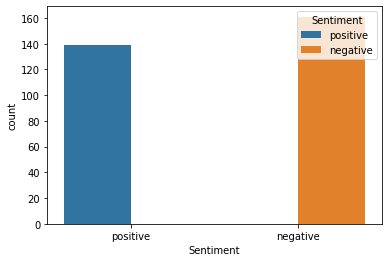

In [ ]:
#Cek Jumlah Review dari Masing-masing Sentiment yang diterima
sns.countplot(x='Sentiment', hue="Sentiment", data=data);

# **Pemrosesan Data**

In [ ]:
#Pemrosesan Data
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 1].values
le = LabelEncoder()
le.fit(["positive", "negative"])

print(list(le.classes_))
y = le.transform(data.iloc[:,0].values)

#y = data.iloc[:, 1].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['negative', 'positive']
(300,)
<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
(300,)
1


In [ ]:
#Membuat Empty List
processed_tweet = []

for data in range(0, len(X)):
  # Hapus semua special characters
  processed_data = re.sub(r'\W', ' ', str(X[data]))

  # Hapus semua single characters
  processed_data = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_data)

  # Hapus single characters dari awal
  processed_data = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_data)

  # Substitusi multiple spaces dengan single space
  processed_data = re.sub(r'\s+', ' ', processed_data, flags=re.I)

  # Hapus prefixed 'b'
  processed_data = re.sub(r'^b\s+', ' ', processed_data)

  # Ubah menjadi Lowercase
  processed_data = processed_data.lower()

  # Masukkan ke list kosong yang telah dibuat sebelumnya
  processed_tweet.append(processed_data)

In [ ]:
# Cek Sebelum Cleaning Data
print(str(X[:5]))
print()

# Cek Setelah Cleaning Data
processed_data[:5]

['<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>'
 'Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>'
 'Selamat pagi <PROVIDER_NAME>  bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja  <URL>'
 'Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!'
 'Selamat malam PENDUSTA <PROVIDER_NAME> ']



'sinya'

In [ ]:
# SKEMA TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(processed_data).toarray()

ValueError: ignored

# **Handling Imbalanced Data**

In [ ]:
from collections import Counter

counter = Counter(y)
print(counter)


NameError: ignored